In [2]:
import pandas as pd
tweet_data1 = pd.read_csv('CV_tweets.csv')
tweet_data2 = pd.read_csv('CV_tweets_2.csv')

In [3]:
tweet_data1['Location'].value_counts()

Lagos, Nigeria                  698
Nigeria                         495
Abuja, Nigeria                  141
Lagos                           106
Accra, Ghana                     57
Ibadan, Nigeria                  46
Abuja                            43
Port Harcourt, Nigeria           42
Ghana                            34
Lagos Nigeria                    31
Kano, Nigeria                    26
Kaduna, Nigeria                  24
lagos                            23
Lagos,Nigeria                    22
Nigeria                          21
Ilorin, Nigeria                  21
Uganda                           20
nigeria                          19
Ikeja, Nigeria                   18
PA                               17
Jos, Nigeria                     16
Lagos, Nigeria.                  15
Benin-City, Nigeria              15
Greater Accra, Ghana             15
Lagos                            14
Pacific Northwest                14
Enugu, Nigeria                   13
Ibadan                      

In [4]:
#collect major tweets containing nigeria related places
ng_tweets_data1 = tweet_data1[tweet_data1['Location'].str.contains('Nigeria|Lagos|Abuja|lagos|nigeria',na=False)]

In [5]:
#combine the two Tweets dataframes into one
frames = [ng_tweets_data1,tweet_data2]
combined_ng_tweets = pd.concat(frames,axis=0)
len(combined_ng_tweets)

3839

In [6]:
#get only Tweet column
ng_tweets = combined_ng_tweets['Tweet']

In [7]:
#see deails about the data. Note the presence of duplicates
ng_tweets.describe()

count                                                  3839
unique                                                 3493
top       b'Repeat after me...\n\n- I will not forward W...
freq                                                      6
Name: Tweet, dtype: object

In [8]:
#get only the unique tweets and convert to list
ng_tweets= ng_tweets.unique().tolist()
len(ng_tweets)

3493

In [9]:
#First 5 tweets
ng_tweets[:5]

["b'I wish I could just be Corona virus ,, traveling from one country to another without transport money ,,chai life for sweet die'",
 'b"The Corona virus is a man made virus which was created to curtail population growth ...\\nCall this a conspiracy theory but that\'s the truth and the sheep is always ignorant of the truth #coronavirusnigeria #COVID19Nigeria #coronavirus #coronavirusinlagos"',
 "b'@lilcel4 That\\xe2\\x80\\x99s how una dey catch all this Yama Yama \\xf0\\x9f\\xa6\\xa0 corona virus'",
 "b'Ein own emergency go pass person wei get Corona and Virus https://t.co/XKNIm7sPo8'",
 "b'Corona virus is real, no lapse am o'"]

In [15]:
import re
def clean_tweet(tweet):
    #remove twitter usernames e.g. @user
    processed_tweet = re.sub(r"@[A-Za-z0-9]*","", tweet)
    #remove encoded charaacters \\xe2
    processed_tweet = re.sub(r"\\x\S+", " " ,processed_tweet)
    #remove the starting bytes symbol (b) and the quotes
    processed_tweet = re.sub(r"^b'|^b\"|'$|\"$", " ", processed_tweet)
    #remove links
    processed_tweet = re.sub(r"\w+:\/\/\S+", " ", processed_tweet)    
    '''processed_tweet = processed_tweet.lower()
    tweet_words = processed_tweet.split()
    filtered_tweet = []
    for word in tweet_words:
        if word not in stop_words and word not in string.punctuation:
            filtered_tweet.append(word)
    cleaner_tweet=' '.join(filtered_tweet)
    cleaned_tweets.append(cleaner_tweet)'''
    return processed_tweet

In [16]:
#import the two analyzers to used; vader and TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from textblob import TextBlob

In [17]:
def check_sentiment(tweet):
    """get the sntiment of each tweet using the two algorithms """
    global textblob_pos 
    global textblob_neg 
    global textblob_neu 
    global vader_pos 
    global vader_neg 
    global vader_neu 
    sentiment_dict = analyzer.polarity_scores(tweet)
    if sentiment_dict['compound'] >=0.05:
        vader_pos += 1        
    elif sentiment_dict['compound']<=-0.05:
        vader_neg +=1

    else:
        vader_neu += 1

    tb = TextBlob(tweet)
    if tb.sentiment.polarity > 0:
        textblob_pos += 1

    elif tb.sentiment.polarity == 0:
        textblob_neu += 1
    else:
        textblob_neg += 1
        

In [19]:
#variables to hold the count of each sentiment
textblob_pos = 0
textblob_neg = 0
textblob_neu = 0
vader_pos = 0
vader_neg = 0
vader_neu = 0

for  tweet in ng_tweets:
    cleaned_tweet = clean_tweet(tweet)
    check_sentiment(cleaned_tweet)

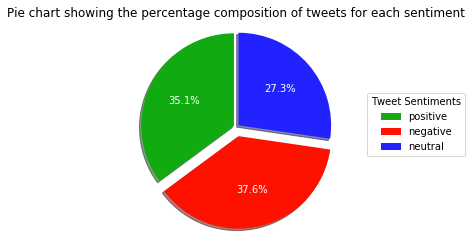

In [21]:
#Visualization of the Vader sentiment in pie chart
import matplotlib.pyplot as plt
labels = ['positive','negative', 'neutral']
sizes = [vader_pos, vader_neg, vader_neu]
colors = ['#11aa11', '#ff1100', '#2222ff']
explode = (0.03,0.1,0.03)
fig1, ax1 = plt.subplots(figsize=(7,4))
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
        explode=explode, textprops=dict(color='w'))
ax1.axis('equal')
ax1.legend(wedges, labels,title='Tweet Sentiments',bbox_to_anchor = (0.9, 0, 0.2,0.7))
ax1.set_title('Pie chart showing the percentage composition of tweets for each sentiment')
plt.savefig('CVSA.png')
plt.show()

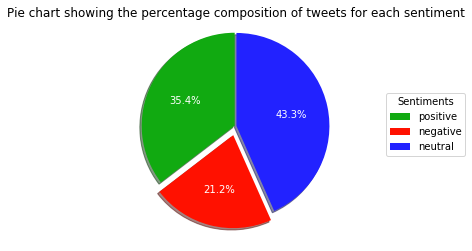

In [22]:
import matplotlib.pyplot as plt
labels = ['positive','negative', 'neutral']
sizes = [textblob_pos,textblob_neg,textblob_neu]
colors = ['#11aa11', '#ff1100', '#2222ff']
explode = (0.01,0.1,0.01)
fig1, ax1 = plt.subplots(figsize=(7,4))
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
        explode=explode, textprops=dict(color='w'))
ax1.axis('equal')
ax1.legend(wedges, labels,title='Sentiments',bbox_to_anchor = (0.9, 0, 0.2,0.7))
ax1.set_title('Pie chart showing the percentage composition of tweets for each sentiment')
plt.savefig('CVSA2.png')
plt.show()